In [13]:
import pandas as pd
import numpy as np
import datetime 
from pandas.plotting._matplotlib import converter
converter.register()
from datetime import date
from datetime import timedelta  
import matplotlib.pyplot as plt

In [14]:
#importing excel file and removing rows with null values
df = pd.read_excel(r'./Documents/PO_Tracker_060920.xlsx', sheet_name='PO Tracker')
df = df.dropna(axis=0, subset=['Date Ordered'])
df = df.dropna(axis=0, subset=['Estimated Delivery Date'])

In [15]:
#calculating delivery times 
df['Delivery Time'] = (df['Estimated Delivery Date'] - df['Date Ordered']).dt.days

In [16]:
#calculating total ordered for each category
total_ordered = df.groupby(['Product Category'])['QTY Ordered in EA'].sum()

In [17]:
#Calculating percent of total ordered for each order
for category in df['Product Category']:
    df['Percent Ordered'] = (df['QTY Ordered in EA'] / total_ordered[category])*100

In [22]:
#selecting rows for shoe covers
shoe_covers = df.loc[df['Product Category'] == 'Shoe Covers']

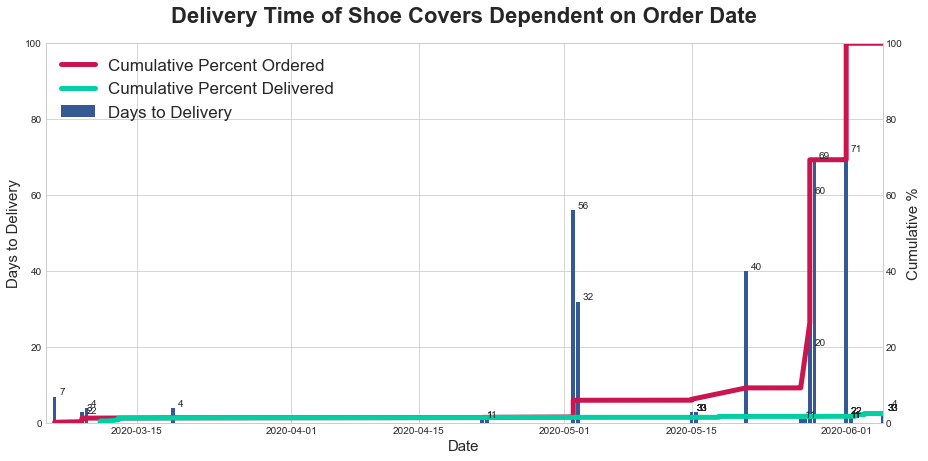

In [21]:
#settings for plot
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(15,7))

#ploting cumulative percent ordered
shoe_covers = shoe_covers.sort_values(by=['Date Ordered'])
result, temp = [], 0
for value in shoe_covers['Percent Ordered']:
    temp += value
    result.append(temp)
shoe_covers["Cumulative Percent Ordered"] = result
plt.plot('Date Ordered', 'Cumulative Percent Ordered', data=shoe_covers, color='#CA1551', linewidth=5)

#plotting cumulative percent delivered 
shoe_covers = shoe_covers.sort_values(by=['Estimated Delivery Date'])
result, temp = [], 0
for value in shoe_covers['Percent Ordered']:
    temp += value
    result.append(temp)
shoe_covers["Cumulative Percent Delivered"] = result
plt.plot( 'Estimated Delivery Date', 'Cumulative Percent Delivered', data=shoe_covers, color='#03CEA4',linewidth=5)

#plotting delivery times 
shoe_covers = shoe_covers.sort_values(by=['Date Ordered'])
result, prev =[], 0
for value in shoe_covers['Date Ordered']:
    if(value == prev):
        value += timedelta(days=.5)
    prev = value
    result.append(value)
bars = plt.bar(result, 'Delivery Time', data=shoe_covers, color='#345995', width = .4, label='Days to Delivery')

#labeling bars with delivery times
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() +.7 , yval + .5, yval)

#styling for graph
plt.legend(fontsize=17)
axes = plt.gca()
axes.set_ylim([0,100])
axes.set_xlim([datetime.date(2020, 3, 5), datetime.date(2020, 6, 5)])
plt.title('Delivery Time of Shoe Covers Dependent on Order Date', fontsize=22, pad=20, fontweight='bold')
plt.xlabel('Date', fontsize=15)
plt.ylabel('Days to Delivery', fontsize=15)
axes.secondary_yaxis('right').set_ylabel('Cumulative %', fontsize=15)
plt.show()